## Exploratory Data Analysis on Netflix Data
#### RaphDeAnalyst
#### Dataset Available at :*https://www.kaggle.com/datasets/shivamb/netflix-shows*

### Importing Necessary Library

In [1]:
import pandas as pd
import os
import plotly.express as px

In [2]:
# Getting the current working directory
pwd = os.getcwd()

### Importing the dataset

In [3]:
data_import = pd.read_csv(pwd + "\\netflix_titles.csv")
# converts the date_added column to a datetime format
data_import["date_added"] = pd.to_datetime(data_import["date_added"].str.strip(), format='%B %d, %Y') 
# data_import.dtypes # show the type of data a column holds
data_import.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# Making a copy of the original dataset, incase I have to revert or rollback
data_import_copy = data_import.copy() 
data_import_copy.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Creating new columns; months and day

In [5]:
# Creating month column
# data_import_copy["date_added_month"] = data_import_copy["date_added"].dt.month

# # Convert month numbers to month names
# data_import_copy["date_added_month"] = data_import_copy["date_added_month"].apply(lambda x: pd.Timestamp(2022, x, 1).strftime('%B'))
# # This lambda function says, "Take a number (x), use it to create a date in the year 2022, with that number as the month, 
# # and then tell me the full month name. !!! THIS FUNCTION CREATED ONLY FOR JANUARY


# Creating month column, this gives the month number alone
data_import_copy["date_added_month"] = data_import_copy["date_added"].dt.month

# Create a dictionary to map month numbers to month names
month_name_mapping = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Replace the month number with their respective names using map function()
data_import_copy["date_added_month"] = data_import_copy["date_added_month"].map(month_name_mapping)


# Display the updated DataFrame
# print(data_import_copy[["date_added_month", "date_added_month"]])

data_import_copy.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September


In [6]:
# Creating day column
data_import_copy["date_added_day"] = data_import_copy["date_added"].dt.dayofweek

# Convert day of the week numbers to day names using lambda function
data_import_copy["date_added_day"] = data_import_copy["date_added_day"].apply(lambda x: pd.Timestamp(2022, 1, int(x) + 1).strftime('%A') 
                                    if not pd.isna(x) else None) #This lambda function takes a value x, converts it to an integer (int(x)), 
                                                                # adds 1, creates a timestamp for January 1, 2022, and then extracts the full day name
                                                                # using strftime('%A'). If the original value x is not a NaN (not missing), 
                                                                # it applies this conversion; otherwise, it returns None.


# Display the updated Data
data_import_copy.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_month,date_added_day
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,Thursday
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,Wednesday
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,Wednesday
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,Wednesday
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,Wednesday


### Dataset description

In [7]:
# describes numeric data in the table
data_import_copy.describe() 

,date_added,release_year
count,8797,8807.000000
mean,2019-05-17 05:59:08.436967168,2014.180198
min,2008-01-01 00:00:00,1925.000000
25%,2018-04-06 00:00:00,2013.000000
50%,2019-07-02 00:00:00,2017.000000
75%,2020-08-19 00:00:00,2019.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,8.819312


### Date Analysis

#### *From here onwards Movies and TV Shows will be collectively reffered to as Shows*

<Axes: >

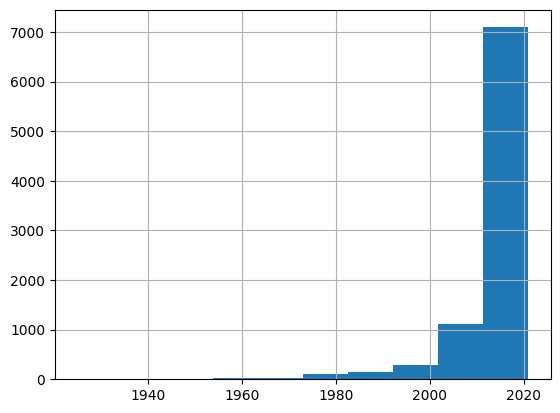

In [8]:
# what year has the highest number of shows released using matplotlib library
data_import_copy["release_year"].hist()

In [9]:
 # what year has the highest number of shows released using plotly library
px.histogram(data_import_copy, x="release_year", color = 'type')

<Axes: >

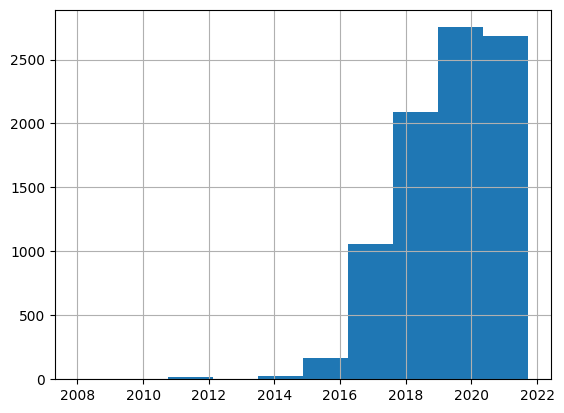

In [10]:
 # what year has the highest number of movie or series added using matplotlib library
data_import_copy["date_added"].hist()
# data_import_copy.groupby("date_added")["date_added"].max()


In [11]:
px.histogram(data_import_copy, x="date_added", color = "date_added_month") # what year has the highest number of movie or series added using plotly library

In [12]:
total_movies_per_month = data_import_copy.groupby('date_added_month')['show_id'].count().reset_index()
total_movies_per_month

,date_added_month,show_id
0,April,764
1,August,755
2,December,813
3,February,563
4,January,738
5,July,827
6,June,728
7,March,742
8,May,632
9,November,705


In [13]:
px.histogram(data_import_copy, x=["type", "date_added_month"], color="type",
            labels=dict(type = "Shows", value = "Month"), text_auto=True) # average number of movies and shows added per months 

In [14]:
total_movies_per_day = data_import_copy.groupby('date_added_day')['show_id'].count().reset_index()
total_movies_per_day

,date_added_day,show_id
0,Friday,751
1,Monday,1288
2,Saturday,851
3,Sunday,1197
4,Thursday,816
5,Tuesday,1396
6,Wednesday,2498


In [15]:
 # what day of the month has the h
 # ighest number of movies of showse
fig = px.histogram(total_movies_per_day, x="date_added_day", y = "show_id", color="date_added_day",text_auto=True, 
                   labels=dict(date_added_day = "Days", show_id = "Count of Shows")). update_xaxes(categoryorder = "total descending")
fig.show()

#### Findings

##### 1. 2018 had the highest number of shows released, with a total of count of 698
##### 2. most shows were added on Nov to Dec 2019
##### 3. More shows were added to the platform on July and December, meaning Netflix adds movies at the middle and end of the year more than any other months
##### 4. Movies are added to the platform at the middle of the week (Wdnesday) more than any other day 

### Type of show Analysis

type
Movie      6131
TV Show    2676
Name: release_year, dtype: int64

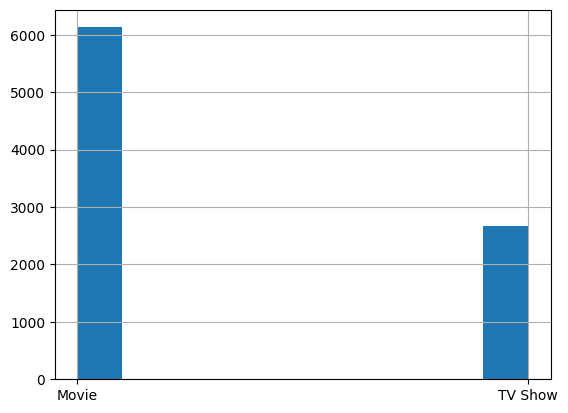

In [16]:
data_import["type"].hist() # what type of shows is the most produced using matplotlib library
data_import.groupby("type")["release_year"].count() # counts the total number of production by show type

In [17]:
px.histogram(data_import_copy, x = "type", labels=total_movies_per_day)

#### Findings

##### Overall, movies were released more than TV Shows

### Country Analysis

In [18]:
#data_import_copy["country"].unique() # some country is actually a list of countries e.g "South Africa, United States' 'United States, Mexico"

In [19]:
Country_Count = data_import_copy.copy()

# Split the countries based on delimeter (",") and then concatenate
Country_Count = pd.concat([Country_Count, data_import_copy["country"].str.split(",", expand=True)], axis = 1)

# Unpivot the columns using melt function()
Country_Count = Country_Count.melt(id_vars=["type", "title"], value_vars=range(12), value_name="Country")
Country_Count = Country_Count[Country_Count["Country"].notna()]
Country_Count["Country"] = Country_Count["Country"].str.strip()
# Country_Count = Country_Count.drop(columns = "variable", inplace = True) # the variable column isn't needed
Country_Count

,type,title,variable,Country
0,Movie,Dick Johnson Is Dead,0,United States
1,TV Show,Blood & Water,0,South Africa
4,TV Show,Kota Factory,0,India
7,Movie,Sankofa,0,United States
8,TV Show,The Great British Baking Show,0,United Kingdom
...,...,...,...,...
78859,Movie,The Look of Silence,8,Germany
85496,Movie,Barbecue,9,Sweden
87666,Movie,The Look of Silence,9,Netherlands
94303,Movie,Barbecue,10,United States


In [20]:
# Country_Count = Country_Count.drop(columns = "variable", inplace = True) # the variable column isn't needed
Country_Count

,type,title,variable,Country
0,Movie,Dick Johnson Is Dead,0,United States
1,TV Show,Blood & Water,0,South Africa
4,TV Show,Kota Factory,0,India
7,Movie,Sankofa,0,United States
8,TV Show,The Great British Baking Show,0,United Kingdom
...,...,...,...,...
78859,Movie,The Look of Silence,8,Germany
85496,Movie,Barbecue,9,Sweden
87666,Movie,The Look of Silence,9,Netherlands
94303,Movie,Barbecue,10,United States


In [21]:
# by_country = Country_Count.groupby("Country")["title"].count()
# by_country.sum()
Country_Count

,type,title,variable,Country
0,Movie,Dick Johnson Is Dead,0,United States
1,TV Show,Blood & Water,0,South Africa
4,TV Show,Kota Factory,0,India
7,Movie,Sankofa,0,United States
8,TV Show,The Great British Baking Show,0,United Kingdom
...,...,...,...,...
78859,Movie,The Look of Silence,8,Germany
85496,Movie,Barbecue,9,Sweden
87666,Movie,The Look of Silence,9,Netherlands
94303,Movie,Barbecue,10,United States


In [22]:
px.histogram(Country_Count, x = "Country", color = "type", text_auto=True). update_xaxes(categoryorder = 'total descending')

#### Top ten Countries by Movies produced

In [23]:

# Group by Country and count the number of movies for each
Country_List = Country_Count.groupby('Country')['type'].count().reset_index(name='CountryCount')

# Sort the Country based on the number of movies in descending order
sorted_country = Country_List.sort_values(by='CountryCount', ascending=False)

# Get the top ten Country
top_ten_countries = sorted_country.head(10)

# Display the result
# print(top_ten_countries)
px.histogram(top_ten_countries, x = "Country", y = "CountryCount", text_auto=True)


#### Findings

##### United states had the highest number of shows produced

#### Rating analysis

###### * PG-13: Some Material May Be Inappropriate for Children Under 13; * TV-MA: Mature Audience; * PG: Some Material May Not Be Suitable for Children; * TV-14: Some Material May Be Inappropriate for Children Under 14; * TV-PG: Some Material May Not Be Suitable for Children; * TV-Y: Appropriate for All Children; * TV-Y7: For Children Age 7 and Above; * R: Restricted to Viewers Over 18; * TV-G: General Audience; * G: General Audiences; * NC-17: Adults Only; * NR: Not Rated; * TV-Y7-FV: Directed to Older Children; * UR: Unrated

In [24]:
data_import_copy["rating"].unique()
# data_import_copy[data_import_copy["rating"] == 'nan'].count()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [25]:
# The 'rating' column contains incorrect ratings ([74 min', '84 min', '66 min']) and also nan values
valid_ratings = ['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R', 'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR']

# Filter out unwanted ratings and NaN
filtered_data = data_import_copy[data_import_copy['rating'].isin(valid_ratings)]

# Calculate percentage distribution
Ratings = filtered_data.groupby("rating")["rating"].count()
Denominator = filtered_data["rating"].count()
Percentage = Ratings / Denominator * 100

# Create a DataFrame with the percentage and rating columns
percentage_df = pd.DataFrame({'rating': Percentage.index, 'percentage': Percentage.values})

# Create a pie chart
fig = px.pie(percentage_df, values='percentage', names='rating', title='Rating Distribution')

# Show the chart
fig.show()


In [26]:
px.histogram(data_import_copy, x = "rating").update_xaxes(categoryorder = 'total descending')

#### Findings

##### Movies rated TV-MA and TV-14 had the highest shows produced, with TV-MA constituting about 36% of the total Number of shows.

#### Duration Analysis

In [27]:

px.histogram(data_import_copy, x = "duration", color='type', text_auto=True, 
              labels=dict(duration = "Duration", type = "Shows")).update_xaxes(categoryorder = 'total descending')

In [28]:
# Count the number of shows associated with different durations and create a coulmn "DurationCount" for it
Duration_Count = data_import_copy.groupby(["duration", "type"])["title"].count().reset_index(name="DurationCount")

# Sort the data by the number of DurationCount
sorted_duration = Duration_Count.sort_values(by='DurationCount', ascending=False)

# Get the top ten durations
top_ten_duration = sorted_duration.head(10)

fig = px.histogram(top_ten_duration, x="duration", y="DurationCount", color="type",
                   text_auto=True, labels=dict(duration="Duration", DurationCount="Total Shows", type = "Shows"))

fig.show()


#### FIndings

##### 1. For movies, durations ranging from 1 to 3 seasons are very popular however, 1 season movies are most popular
##### 2. TV Shows ranging from 90 - 96 minutes are among the top 10 durations with higher number of shows

### Director Analysis

In [29]:
# Filter the table based on director columns with values
Director_list = data_import_copy[data_import_copy["director"].notna()]
Director_list.head(3)
# Number of rows reduced to 6173 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_month,date_added_day
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,Thursday
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,Wednesday
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,September,Wednesday


In [30]:
# Group by director and count the number of shows for each
director_movie_count = Director_list.groupby('director')['title'].count().reset_index(name='ShowCount')

# Sort the directors based on the number of shows in descending order
sorted_directors = director_movie_count.sort_values(by='ShowCount', ascending=False)

# Get the top ten directors
top_ten_directors = sorted_directors.head(10)

# Display the result
print(top_ten_directors)


                    director  ShowCount
3392           Rajiv Chilaka         19
3443  Raúl Campos, Jan Suter         18
4046             Suhas Kadav         16
2598            Marcus Raboy         16
1790               Jay Karas         14
685      Cathy Garcia-Molina         13
1787             Jay Chapman         12
4480         Youssef Chahine         12
2671         Martin Scorsese         12
4020        Steven Spielberg         11


In [31]:
px.histogram(top_ten_directors, x = "director", y = "ShowCount", labels=dict(director = "Directors", ShowCount = "Count of Shows"))

In [32]:
data_import_copy["cast"].unique()

array([nan,
       'Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng',
       'Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera',
       ...,
       'Jesse Eisenberg, Woody Harrelson, Emma Stone, Abigail Breslin, Amber Heard, Bill Murray, Derek Graf',
       'Tim Allen, Courteney Cox, Chevy Chase, Kate Mara, Ryan Newman, Michael Cassidy, Spencer Breslin, Rip Torn, Kevin Zegers',
       'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy'],
      dtype=object)

In [33]:
# split "cast" column to get individual cast
data_import_copy["Cast Count"] = data_import_copy["cast"].str.split(",")

# Remove rows with NaN
data_import_copy =  data_import_copy[data_import_copy["Cast Count"].notna()]

# Get the total number of cast in each row
data_import_copy["Cast Count"] = data_import_copy["Cast Count"].apply(lambda x: len(x))
data_import_copy.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_month,date_added_day,Cast Count
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,Wednesday,19
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,Wednesday,9
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,Wednesday,8


In [34]:
px.histogram(data_import_copy, x = "Cast Count")

#### Findings

##### Shows with 1, 8 or 10 casts are more popular in the dataset

In [35]:
data_import_copy['listed_in']

1         International TV Shows, TV Dramas, TV Mysteries
2       Crime TV Shows, International TV Shows, TV Act...
4       International TV Shows, Romantic TV Shows, TV ...
5                      TV Dramas, TV Horror, TV Mysteries
6                                Children & Family Movies
                              ...                        
8801              Dramas, International Movies, Thrillers
8802                       Cult Movies, Dramas, Thrillers
8804                              Comedies, Horror Movies
8805                   Children & Family Movies, Comedies
8806       Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 7982, dtype: object

In [36]:
# split "listed_in" column to get individual cast
data_import_copy['listed_in_count'] = data_import_copy['listed_in'].str.split(",")

# Remove rows with NaN
data_import_copy =  data_import_copy[data_import_copy["Cast Count"].notna()]

# Get the total number of cast in each row
data_import_copy["listed_in_count"] = data_import_copy["listed_in_count"].apply(lambda x: len(x))
data_import_copy['listed_in_count'].max()

3

In [37]:
px.histogram(data_import_copy, x = 'listed_in_count')

<Axes: >

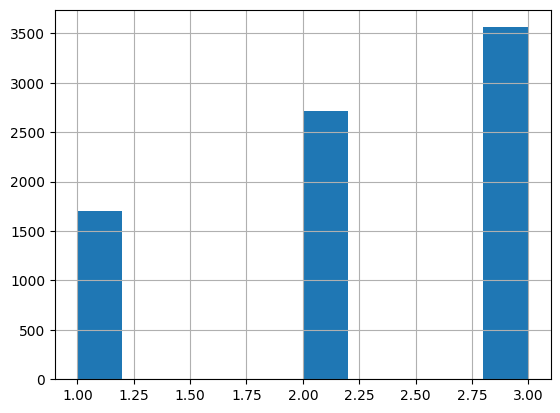

In [38]:
data_import_copy["listed_in_count"].hist() 

#### Fingings

##### Shows listed in 3 genre are most popular in the dataset
